# Analyze Zero-shot

In [37]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import TensorDataset, DataLoader

RANDOM_SEED=1

def set_random_seed_data(seed):
    RANDOM_SEED = seed

def lowercase(text):
    return text.lower()

def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

def preprocess_text(text):
    text = lowercase(text)
    text = remove_nonaplhanumeric(text)
    text = remove_unnecessary_char(text)
    return text

def load_data(PATH):
    test = pd.read_csv(PATH)
    test = test.rename(columns={"content": "text", "polarity": "label"})
    test['label'] = test['label'].apply(lambda x: 1 if x=="positive" else 0)
    test['text'] = test['text'].apply(lambda x: preprocess_text(x))
    
    return test

In [38]:
test = load_data('../../../../../data/trip_advisor/test_set.csv')
test.head()

,text,label
0,kekecewaan untuk ritz standar menginap number ...,0
1,kekecewaan untuk ritz standar menginap number ...,0
2,kekurangan number tidak ada fasilitas apapun l...,0
3,kelebihan lokasi strategis breakfast standard ...,0
4,kelebihan kamar luas dan ada balkon di setiap ...,0


# Zero-shot

In [39]:
# data = pd.read_csv('result_trip_advisor_yelp_XLM_R_A_12389_0.5_full.csv')
data = pd.read_csv('result_trip_advisor_yelp_XLM_R_B_12389_0.5_full.csv')
data['y_pred_int'] = data['y_pred'].apply(lambda x: int(x>=0.5))
data['text'] = test['text'].values
data.head()

,y_pred,y_true,y_pred_int,text
0,0.003014,0,0,kekecewaan untuk ritz standar menginap number ...
1,0.003014,0,0,kekecewaan untuk ritz standar menginap number ...
2,0.009955,0,0,kekurangan number tidak ada fasilitas apapun l...
3,0.001772,0,0,kelebihan lokasi strategis breakfast standard ...
4,0.054279,0,0,kelebihan kamar luas dan ada balkon di setiap ...


In [40]:
count = 0
for i in range(0, data.shape[0]):
    if (data.loc[i].y_pred_int == data.loc[i].y_true) and data.loc[i].y_true==1:
        count+=1
        print("\ny_pred: {}".format(data.loc[i].y_pred))
        print("y_true: {}".format(data.loc[i].y_true))        
        print("text: {}".format(data.loc[i].text))      
        if count==20:
            break


y_pred: 0.98462856
y_true: 1
text: berkunjung saat masih di lokasi yang lama makanan dan service yang memuaskan tapi sayang harganya mahal tetapi masi termasuk worth it karena kualitas daging yang top

y_pred: 0.9911928
y_true: 1
text: berkunjung saat valentine day resto full book kami bersama keluarga jadi kami dapat ruangan yang cukup privacy untuk berhaha hihi tanpa mengganggu couples yang lain menu disajikan indah dan tersedia pelayan yang selalu siap melayani suasana menyenangkan sayang rasa makanan so so tidak seistimewa penyajiannya harga selaras dengan servis dan indahnya penyajian

y_pred: 0.8583745999999999
y_true: 1
text: berkunjung selama satu malam di shangri la hotel di surabaya memberika kesan menarik bagi saya dari segi makanan kualitas selalu terjaga sangat saya nikmati hanya saja saat itu adalah bulan suci ramadhan meski pihak manajemen tidak mengurangi standar pelayanan bagi para tamu yang sedang berpuasa akan tetapi pilihan makanan telah ditetapkan sehingga menu sa

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
cnf_matrix = confusion_matrix(data.y_true.values, data.y_pred_int.values)
print(cnf_matrix)

[[1120  184]
 [  74 1051]]


In [34]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1285   19]
 [1111   14]]


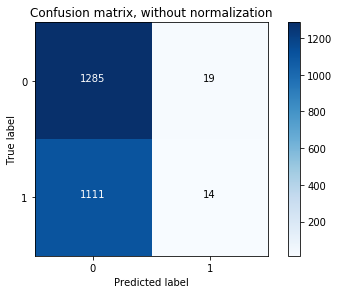

In [35]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1],
                      title='Confusion matrix, without normalization')

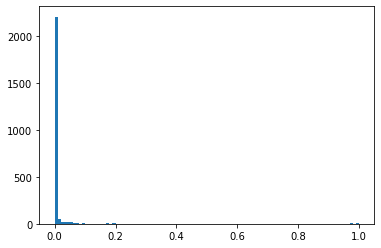

In [36]:
plt.hist(data.y_pred.values, bins=100)
plt.show()